In [ ]:
# The objective of this assignment is to implement and evaluate the K-Nearest Neighbours algorithm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
zoo = pd.read_csv("/content/Zoo.csv")
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [ ]:
zoo.shape

(101, 18)

In [ ]:
zoo.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [ ]:
zoo.dtypes

,0
animal name,object
hair,int64
feathers,int64
eggs,int64
milk,int64
airborne,int64
aquatic,int64
predator,int64
toothed,int64
backbone,int64


In [ ]:
# basic information of dataset
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
# summary statistics of the dataset
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
# check for missing values
zoo.isnull().sum()

,0
animal name,0
hair,0
feathers,0
eggs,0
milk,0
airborne,0
aquatic,0
predator,0
toothed,0
backbone,0


In [ ]:
# # Checking the number of unique values in each column
zoo.nunique()

,0
animal name,100
hair,2
feathers,2
eggs,2
milk,2
airborne,2
aquatic,2
predator,2
toothed,2
backbone,2


In [ ]:
zoo['animal name'].value_counts()

,count
animal name,
frog,2
pony,1
sealion,1
seal,1
seahorse,1
...,...
gorilla,1
goat,1
gnat,1


In [ ]:
zoo['domestic'].unique()

array([0, 1])

In [ ]:
zoo['type'].unique()

array([1, 4, 2, 7, 6, 5, 3])

In [ ]:
zoo['type'].value_counts()

,count
type,
1,41
2,20
4,13
7,10
6,8
3,5
5,4


In [ ]:
# Checking for duplicate rows
zoo.duplicated().sum()

0

In [ ]:
# Displaying duplicate rows
duplicated_rows = zoo[zoo.duplicated(['animal name'])]
duplicated_rows

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [ ]:
zoo['venomous'].value_counts()

,count
venomous,
0,93
1,8


In [ ]:
zoo=zoo.drop(['animal name'],axis=1)
zoo

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


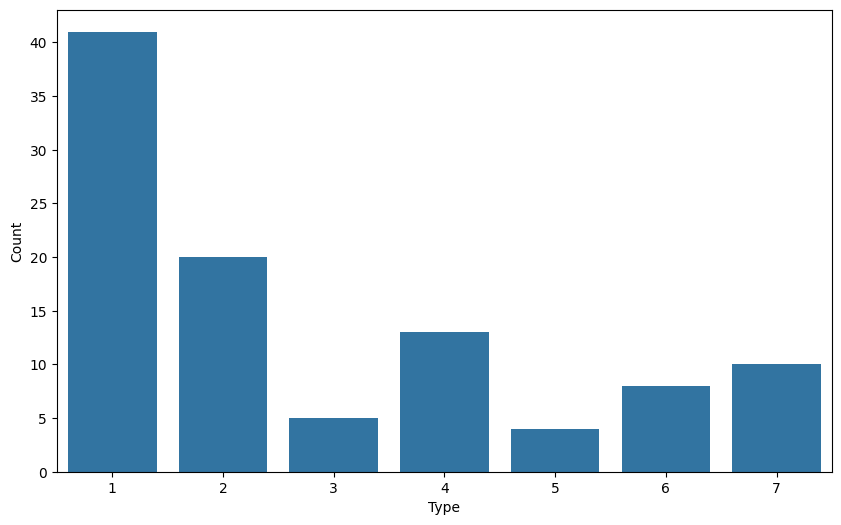

In [ ]:
# countplot for type column
plt.figure(figsize = (10,6))
sns.countplot(x = 'type',data = zoo)
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

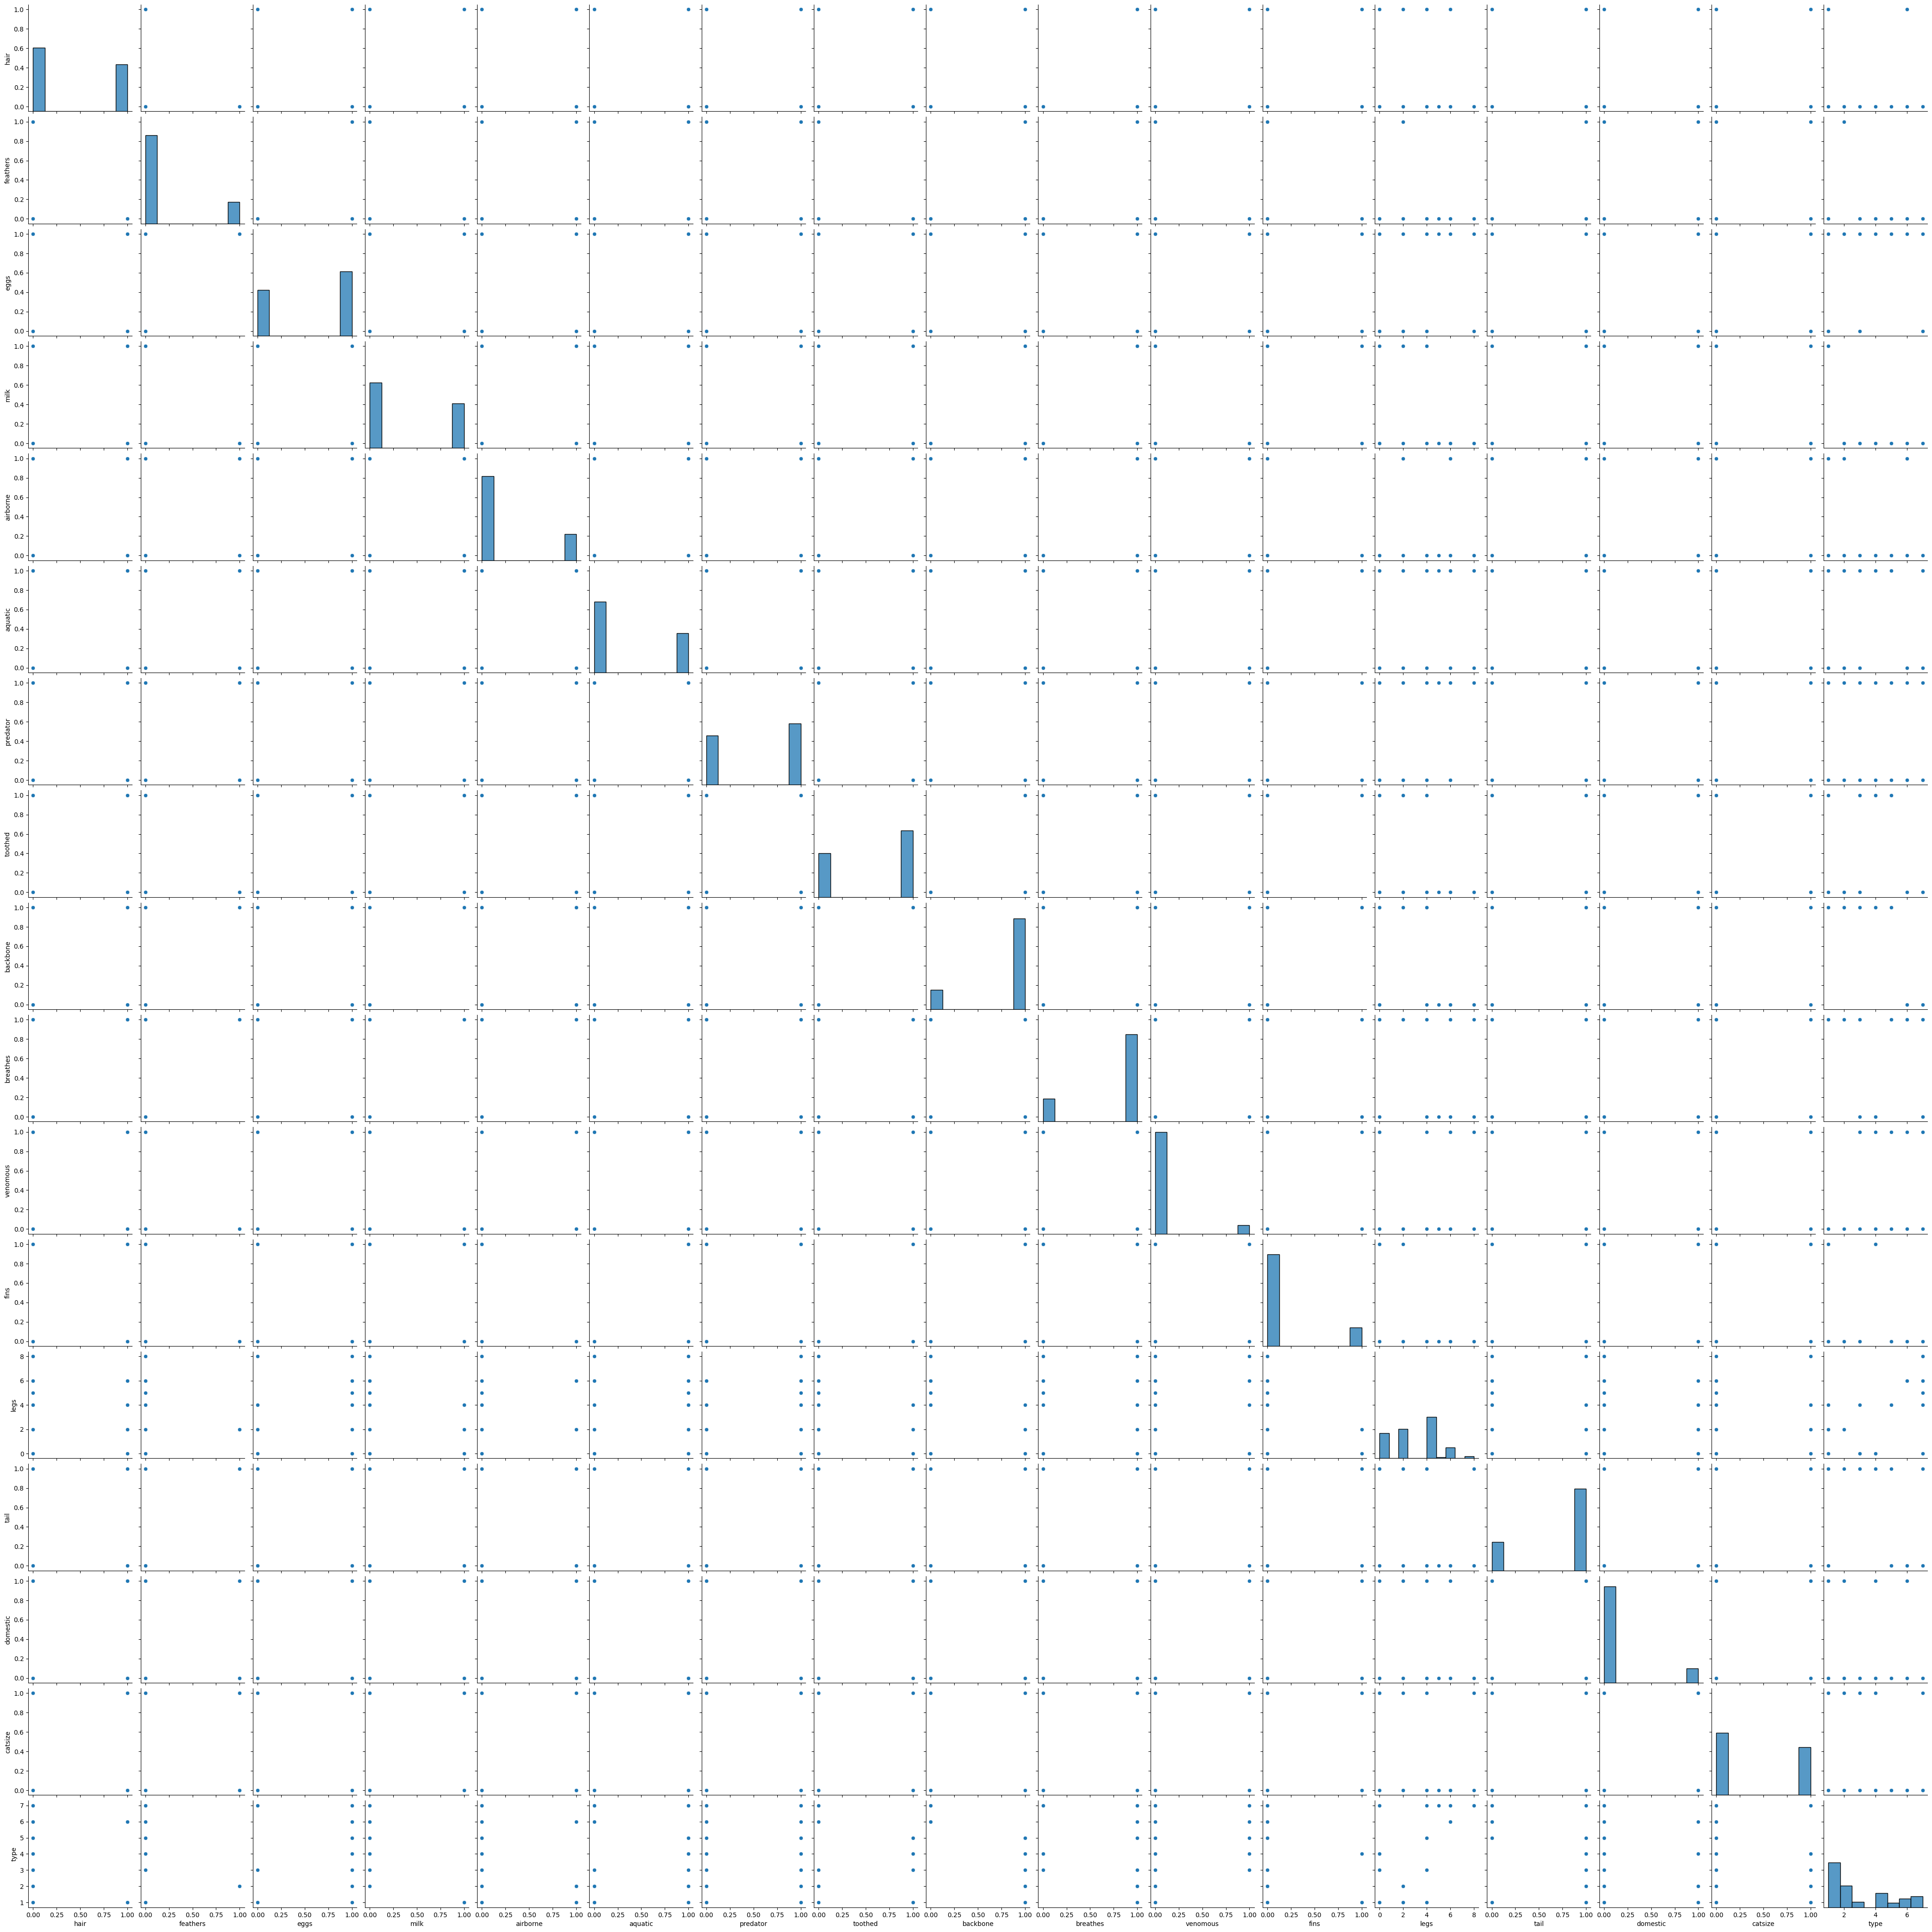

In [ ]:
# Pairplot
sns.pairplot(data = zoo)
plt.show()

In [ ]:
# correlation matrix
corr = zoo.corr()
corr

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
hair,1.000000,-0.427851,-0.817382,0.878503,-0.198431,-0.473554,-0.154769,0.492531,0.191681,0.441149,-0.104245,-0.280313,0.394009,0.048973,0.207208,0.455020,-0.562384
feathers,-0.427851,1.000000,0.419248,-0.410761,0.656553,-0.058552,-0.104430,-0.613631,0.231403,0.254588,-0.145739,-0.223541,-0.206686,0.292569,0.031586,-0.135934,-0.197520
eggs,-0.817382,0.419248,1.000000,-0.938848,0.376646,0.376244,0.011605,-0.642150,-0.340420,-0.382777,0.098689,0.164796,-0.224918,-0.221090,-0.155610,-0.514650,0.661825
milk,0.878503,-0.410761,-0.938848,1.000000,-0.366765,-0.362613,-0.029721,0.628168,0.384958,0.423527,-0.242449,-0.156328,0.214196,0.210026,0.163928,0.574906,-0.723683
airborne,-0.198431,0.656553,0.376646,-0.366765,1.000000,-0.172638,-0.295181,-0.594311,-0.104718,0.286039,0.008528,-0.251157,0.043712,0.009482,0.063274,-0.349768,0.022677
aquatic,-0.473554,-0.058552,0.376244,-0.362613,-0.172638,1.000000,0.375978,0.053150,0.022463,-0.637506,0.087915,0.604492,-0.360638,-0.034642,-0.224308,-0.111866,0.326639
predator,-0.154769,-0.104430,0.011605,-0.029721,-0.295181,0.375978,1.000000,0.129452,0.051022,-0.262931,0.115391,0.190302,-0.099723,0.018947,-0.309794,0.144790,0.061179
toothed,0.492531,-0.613631,-0.642150,0.628168,-0.594311,0.053150,0.129452,1.000000,0.575085,-0.065690,-0.062344,0.364292,-0.193476,0.310368,0.069430,0.344010,-0.471527
backbone,0.191681,0.231403,-0.340420,0.384958,-0.104718,0.022463,0.051022,0.575085,1.000000,0.207666,-0.246611,0.209499,-0.432856,0.731762,0.101733,0.356976,-0.828845
breathes,0.441149,0.254588,-0.382777,0.423527,0.286039,-0.637506,-0.262931,-0.065690,0.207666,1.000000,-0.120752,-0.617219,0.369868,0.088952,0.124068,0.204125,-0.519308


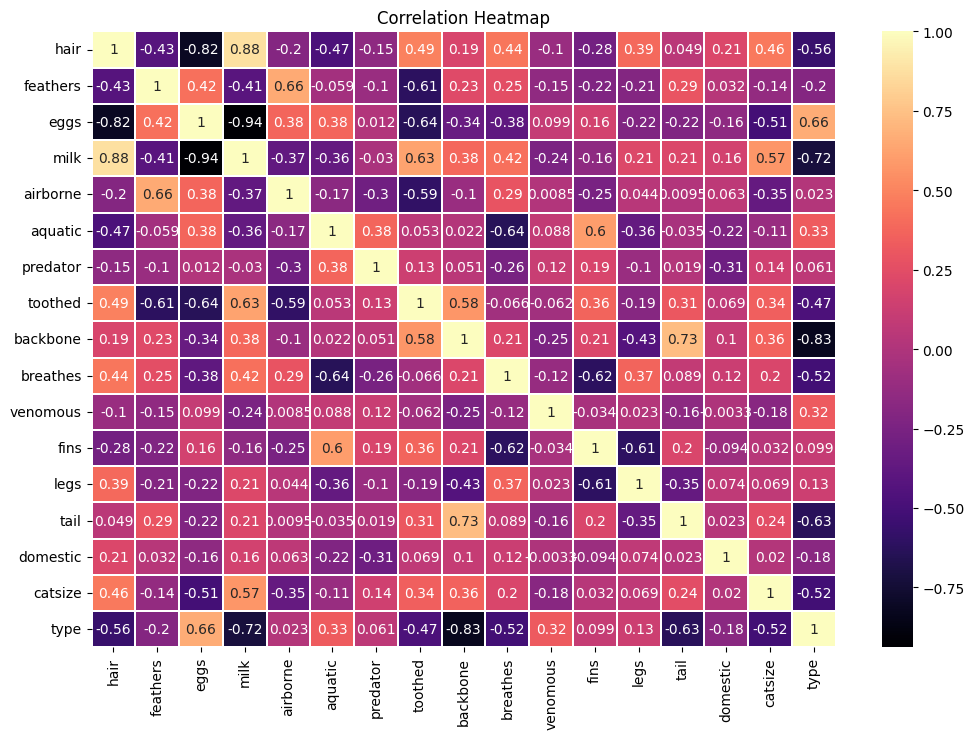

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(zoo.corr(),annot=True,cmap='magma',linewidths = 0.1, linecolor='white')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X = zoo.drop('type', axis =1)
y = zoo['type']

from sklearn.model_selection import train_test_split
# Split the dataset into training and testing sets (80% training, 20% testing).
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 40)

In [ ]:
# Implement the K-Nearest Neighbours algorithm
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
# fit and train the model
knn = model.fit(X_train,y_train)
knn

KNeighborsClassifier()

In [ ]:
# test the model
y_pred = knn.predict(X_test)
y_pred

array([4, 1, 1, 6, 4, 2, 6, 1, 6, 4, 1, 1, 1, 1, 4, 1, 2, 2, 1, 1, 6])

In [ ]:
# get the accuracy
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of KNN model: {accuracy}')

Accuracy of KNN model: 0.7619047619047619


In [ ]:
# cross validation score
from sklearn.model_selection import cross_val_score

cv_knn = cross_val_score(knn, X_train, y_train, cv = 10)
print(f'Cross-validation scores: {cv_knn}')
print(f'Cross Validation Accuracy: {cv_knn.mean()}')

Cross-validation scores: [0.875 1.    1.    1.    1.    0.875 1.    0.875 0.5   0.75 ]
Cross Validation Accuracy: 0.8875


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


The cross-validation scores give us a good sense of how well the K-Nearest Neighbors model is performing on different subsets of the training data.

with the cross validation score we got accuracy of the model performance is 0.88

# Grid Search for Algorithm Tuning

In [ ]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
array = zoo.values

X = zoo.iloc[:, 1:16]
y = zoo.iloc[:, -1]

In [ ]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors = n_neighbors)

In [ ]:
model = KNeighborsClassifier()
grid_search = GridSearchCV(estimator = model, param_grid= param_grid)
# fit the model
knn_grid = grid_search.fit(X_train,y_train)
knn_grid

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [ ]:
# get the best parameters and score
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

best_score = grid_search.best_score_
print(f'Best Score: {best_score}')

Best Parameters: {'n_neighbors': 1}
Best Score: 0.9875


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/

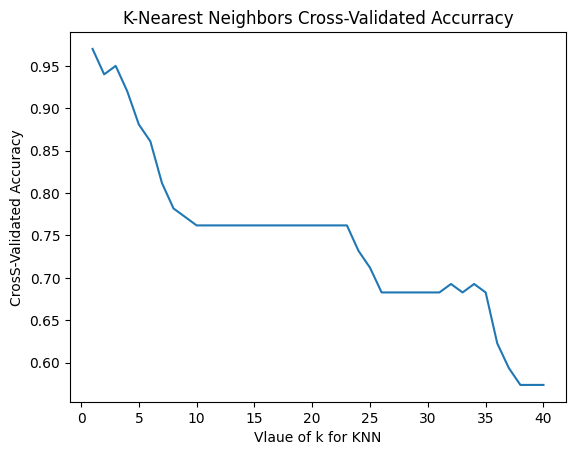

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# choose k between 1 & 41
k_range = range(1,41)
k_scores = []

# use iteration process to calculate different K values in models
for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  cv_scores = cross_val_score(knn, X, y, cv=10)
  k_scores.append(cv_scores.mean())

# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Vlaue of k for KNN')
plt.ylabel('CrosS-Validated Accuracy')
plt.title('K-Nearest Neighbors Cross-Validated Accurracy')
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         3
           4       0.25      1.00      0.40         1
           6       0.50      1.00      0.67         2
           7       0.00      0.00      0.00         2

    accuracy                           0.76        21
   macro avg       0.46      0.67      0.51        21
weighted avg       0.68      0.76      0.70        21



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#Conclusion

We have performed the KNeighborsClassifier,cross vaidation score and Grid Search for algorithm Tuning.

The overall accuracy of the model is 76%.
And the model perfomance with cross validation score is approxiamately 0.88%.

The cross validation score indicates that K-nearest neighbors has an average cross-validation accuracy which means that the model performance is performing well across different subset of data.


#Interview Questions:

#1. What are the key hyperparameters in KNN?

Number of Neighbors (k): This determines how many nearest points are considered when making a prediction.
Choosing an appropriate value for k is critical; a smaller value of k might lead to overfitting, while a larger value might lead to underfitting.

Distance Metric: The distance metric used to measure the distance between data points. Common distance metrics include: Euclidean distance,Manhattan distance,Minkowski distance.

Weighting Scheme: Determines how the contributions of neighboring points are weighted when making predictions. Common weighting schemes include: Uniform weighting: All neighbors contribute equally to the prediction. Distance weighting: The contribution of each neighbor is weighted by its distance, with closer neighbors having a higher influence.

Algorithm: The algorithm used to compute nearest neighbors. The two main algorithms are: Brute force: Computes distances between all pairs of data points and selects the k-nearest neighbors. KD-tree or Ball tree: Data structures that organize data points to efficiently find nearest neighbors.

Parallelization (for large datasets):Some implementations of KNN may offer options for parallelization, allowing the algorithm to leverage multiple CPU cores for faster computation, especially on large datasets.

#2. What distance metrics can be used in KNN?

Here are the most commonly used distance metrics:

Euclidean Distance: Euclidean distance is one of the most widely used distance metrics in KNN. It measures the straight-line distance between two points in Euclidean space.Works well with continuous numerical data.

Manhattan Distance (Taxicab or City Block Distance): Manhattan distance measures the distance between two points by summing the absolute differences of their coordinates. It is named after the distance a taxicab would travel in a grid-like city, where movements are restricted to horizontal and vertical paths.

Minkowski Distance: Minkowski distance is a generalization of both Euclidean and Manhattan distances.

Hamming Distance: Used for categorical data.Hamming distance is used for comparing binary vectors of equal length. It counts the number of positions at which the corresponding symbols are different. It is often used in text mining and genetics.

Chebyshev Distance: Chebyshev distance calculates the maximum absolute difference between the coordinates of two points along any dimension.